## This Person Might Exist - Demo Notebook

### Generating one sample

Create an instance of `PersonGenerator` and call the class method `generate_person()`to get a random sample.

In [1]:
from main import PersonGenerator, value_mapper

pg = PersonGenerator(anonymize=False)
pg.generate_person()[:4]

(30, 'Mikhail Kim', 'mikhkim94@outlook.com', 'silver49')

The first four values defaults to Age, Name, Email and Password.

### Generating multiple samples

With a list comprehension we can generate multiple samples. We then call the `value_mapper` to get labels for additional rows, such as Gender, Martial Status, Education, Occupation and so on.

In [2]:
from main import value_mapper

multiple_samples = [pg.generate_person() for n in range(3)]
value_mapper(multiple_samples)

,Age,Name,Email,Password,Phone,Gender,Marital Status,Education,Occupation,Accommodation,Living with,Everyday satisfaction,Health
0,46,Even Miller,even_miller4@gmail.com,eugene89,0793853625,Male,Married/Common-law partner,University/College degree,Student,"Townhouse, cottage, or similar",Children,2,2
1,65,Nadezhda Romero,nadezhda.romero6@gmail.com,PASSWORD99,0723801127,Female,Single,Incomplete academic education,On sick leave/disability pension,"Townhouse, cottage, or similar",Living alone,1,2
2,51,Sverre Sjogren,sverresjogren73@gmail.com,blowjob39,0762244879,Male,Single,High school diploma,Student,Rental apartment,Family (Partner and children/parents and sibli...,1,2


`value_mapper` defaults to English column names and row values, but can be changed to Swedish:

In [3]:
value_mapper(multiple_samples, language="swedish")

,Ålder,Namn,Email,Lösenord,Telefon,Kön,Civilstånd,Utbildningsnivå,Sysselsättning,Boende,Tillsammans_med,Vardagstillfredsställelse,Hälsa
0,46,Even Miller,even_miller4@gmail.com,eugene89,0793853625,Man,Gift/Sambo,Universitet/Högskola med examen,Studier,"Radhus, villa eller liknande",Barn,2,2
1,65,Nadezhda Romero,nadezhda.romero6@gmail.com,PASSWORD99,0723801127,Kvinna,Ogift,Ofullständig akademisk utbildning,Sjukskriven/sjukersättning,"Radhus, villa eller liknande",Ensamboende,1,2
2,51,Sverre Sjogren,sverresjogren73@gmail.com,blowjob39,0762244879,Man,Ogift,Studentexamen,Studier,Hyresrätt,Familj (Partner och barn/ föräldrar och syskon),1,2


To add other languages, edit the `TranslationMap` in `mapping.py`.

### Custom email generation

Email generation is part of `PersonGenerator`, but can be accessed separately. 

Simply calling the `gen_email()` will generate a random email with default values.

In [4]:
from _email import gen_email
gen_email()

'serrano-viktor@gmail.com'

We can set additional parameters. Check out `_email.py` for details.

In [5]:
gen_email(age=42, force_formal=True, force_domain="backaplan.se")

'almeida.tiril@backaplan.se'

In [6]:
gen_email(age=32, millenial_mail_p=1)

'xX_moonmaster_Xx@live.com'

## Default distributions

In [7]:
person_list = [pg.generate_person() for n in range(1024)]
df = value_mapper(person_list)

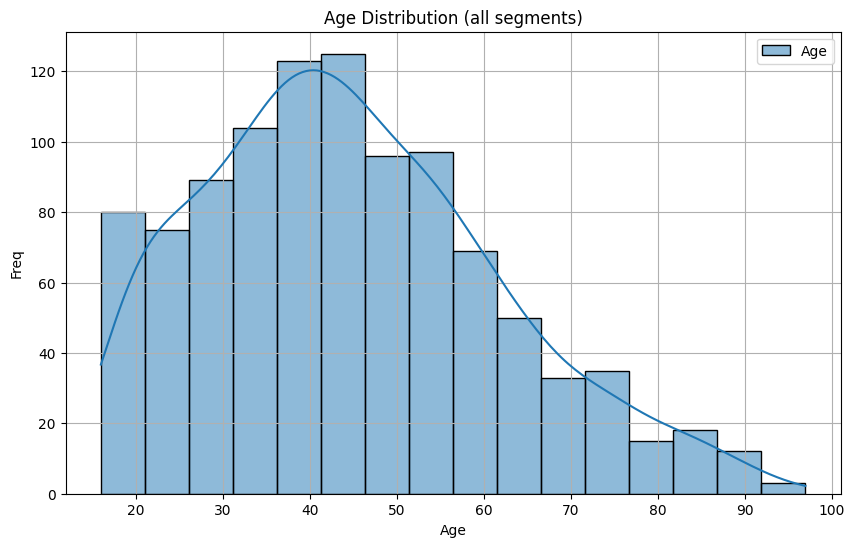

In [8]:
from utils.plots import get_histogram
get_histogram(df['Age'], 'Age Distribution (all segments)', 'Age', 'Freq', bins=16)

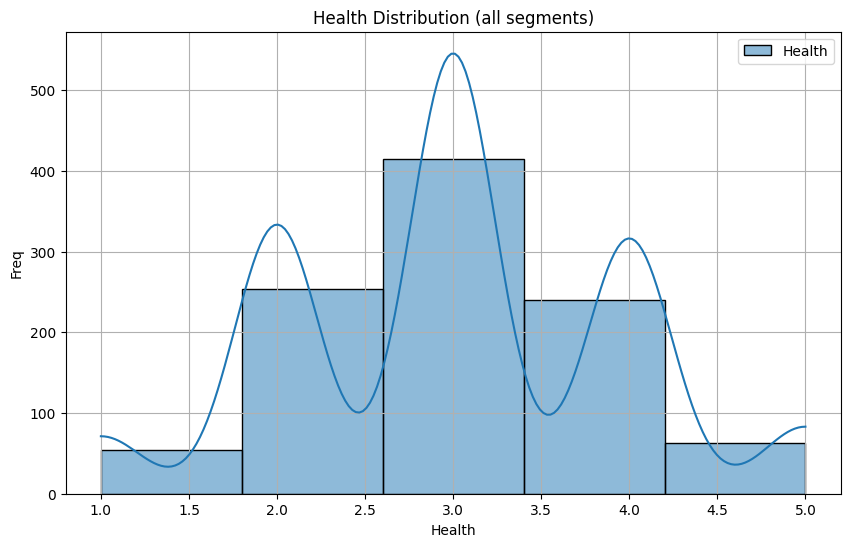

In [9]:
get_histogram(df['Health'], 'Health Distribution (all segments)', 'Health', 'Freq', bins=5)

## Creating custom distributions

We can create custom distributions by modifying the input arguments of `generate_person`.

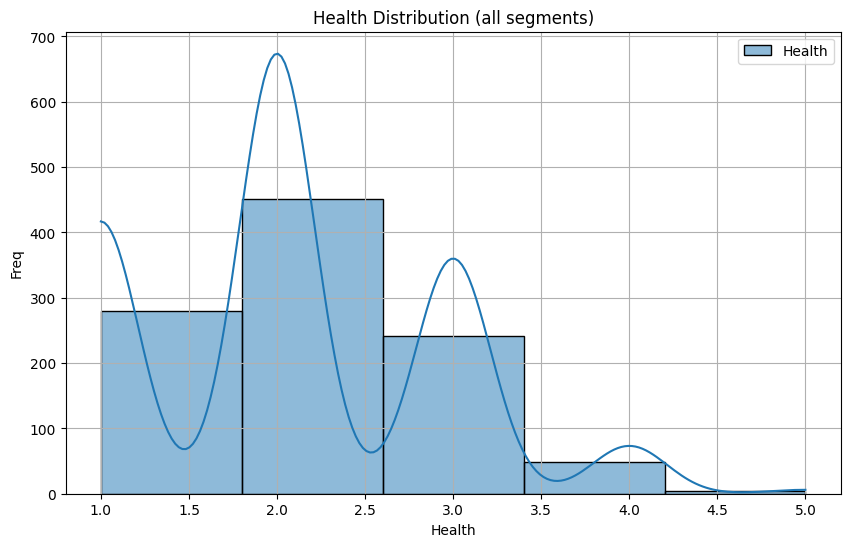

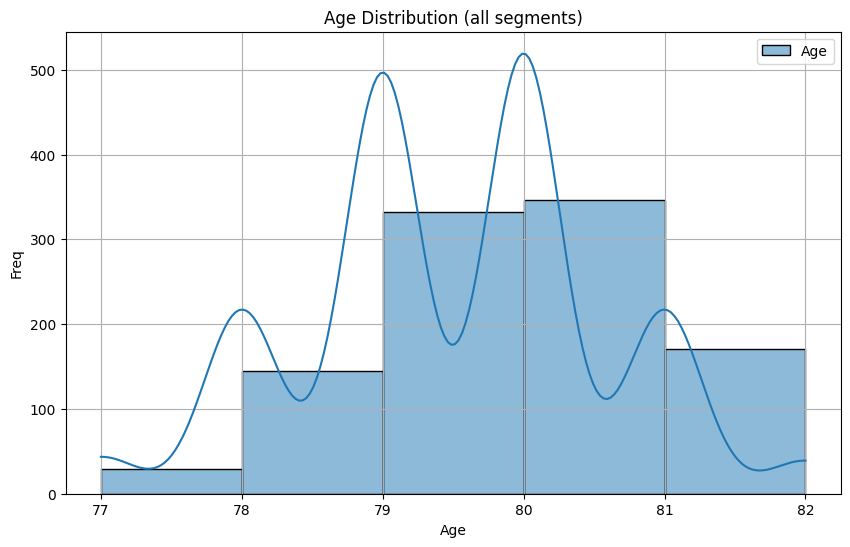

In [10]:
gender = {'female': 0.8,
          'male': 0.2,
          'nb': 0.02,
          }

age = {'mean': 80, 
       'std': 1, 
       'lower_lim': 0,
       'upper_lim': 120,
       }

health = {'mean': 2,
          'std': 1,
          'skewness': -0.1,
          }

custom_person_list = [pg.generate_person(dist_gender=gender, dist_age=age, dist_health=health) for n in range(1024)]

df = value_mapper(custom_person_list)
get_histogram(df['Health'], 'Health Distribution (all segments)', 'Health', 'Freq', bins=5)
get_histogram(df['Age'], 'Age Distribution (all segments)', 'Age', 'Freq', bins=5)

---

## Name Tokenizer

We can feed our name buckets into the tokenizer as such:

In [11]:
from tokenizer import tokenize, get_corpus

name_dict = tokenize(get_corpus('Data/name_corpus.pkl'))

Found 12 keys in corpus: dict_keys(['m_sweden_gpt', 'f_sweden_gpt', 'f_norwa_list', 'm_scandi_gpt', 'f_scandi_gpt', 'm_slavic_gpt', 'f_slavic_gpt', 'last_swe', 'last_gpt_eur0', 'last_gpt_eur2', 'last_gpt_asia', 'last_gpt_mena']).
Done extracting nested dictionaries and lists.

Tokenization running. Found 643 words.
split_type='median'
apply_rules=None

Total tokens : 1286
Unique tokens: 695
Allowed pairs: 241165

Top 3 tokens:
"ma", freq: 26, token: 97
"sson", freq: 16, token: 433
"an", freq: 15, token: 14

Example generations (token pairs):
Jtina, 13 166
Visa, 330 197
Neanda, 225 218


By default, `tokenize` will extract all nested lists and dictionaries from the input.

The words will be split and tokenized.

There is of course a trade-off in the amount of tokens, the possible combinations of words and coputational efficiency.

In [12]:
from tokenizer import get_word

get_word(name_dict, 22)

'ha'

### Combat redundancy
When the tokens are generated, we might end up with redundancy.

In [13]:
hanna = [22, 6, 287, 14, 173, 253, 193, 249, 154, 287]
for h in hanna:
    print(get_word(name_dict, h))

ha
han
a
an
ann
anna
nn
nna
na
a


In [14]:
from tokenizer import check_redundacy

print(check_redundacy().sample(10))

         Name                                             Tokens
628      Omar               [35, 679, 84, 97, 90, 287, 147, 251]
471     Gomes        [382, 312, 35, 679, 84, 492, 159, 194, 634]
72    Maurice  [84, 97, 128, 287, 296, 130, 36, 251, 372, 111...
152     Inger  [250, 169, 20, 188, 625, 382, 353, 170, 159, 1...
256     Arvid                      [287, 147, 251, 330, 74, 250]
532  Svensson  [634, 28, 345, 432, 292, 159, 29, 23, 559, 634...
347  Karoline  [341, 7, 49, 363, 287, 147, 251, 50, 35, 30, 1...
500     Faria      [241, 287, 147, 251, 372, 153, 250, 240, 287]
284    Rasmus       [251, 198, 334, 287, 634, 84, 335, 130, 634]
332   Camilla  [96, 264, 287, 80, 84, 231, 250, 47, 176, 229,...


Maybe heaps could be used here. TODO

Heaps are binary trees for which every parent node has a value less than or equal to any of its children.